# Stage 1: Creating the Classifier
This module performs the Data quality checks and creation of the lexical classifier of Tweets into Relevant and Non-Relevant

In [1]:
import pandas as pd
from termcolor import colored
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lemma = WordNetLemmatizer()
STOPWORDS=set(stopwords.words('english')+list(punctuation))
STOPWORDS.remove("not")

# Classification Tweets into:   Relevant vs Non-Relevant

In [7]:
tweets=classify()

In [8]:
tweets[0] #Sample classified tweet

{'TweetsID': '1216910000000000000',
 'TweetsText': 'were doing everything we can to get our students back in school safely and quickly post hurricanelaura amp hurricanedelta and are thankful to those whove helped already but we need somebody who can get us tents or something asap catholictwitter ',
 'User_Location': 'LOCATION',
 'Date': '24/10/2020 03:29',
 'Baseline_Terms': ['get', 'need', 'get'],
 'Prediction': 1}

In [9]:
predictedTweetsClass=pd.DataFrame(tweets) # Converting list to Dataframes  

In [11]:
predictedTweetsClass.head(2)

,TweetsID,TweetsText,User_Location,Date,Baseline_Terms,Prediction
0,1216910000000000000,were doing everything we can to get our studen...,LOCATION,24/10/2020 03:29,"[get, need, get]",1
1,40367314,URL thanks user_mention amp user_mention amp ...,Danny St.,24/10/2020 03:01,[],0


# Visualizing Classified Tweets

In [15]:
Tweet_count =predictedTweetsClass['Prediction'].value_counts()
Tweet_count

1    6848
0    1918
Name: Prediction, dtype: int64

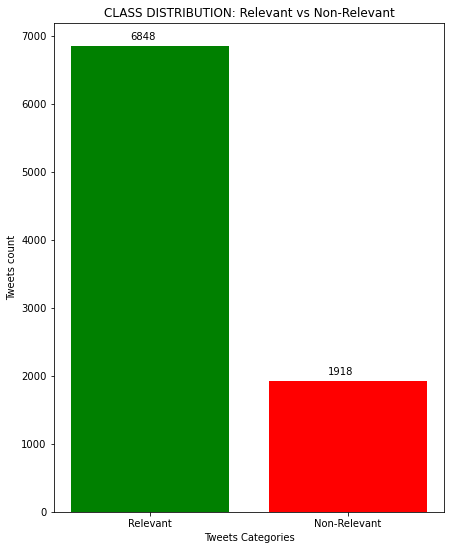

In [13]:
plot_barchat()

# REPORTS

In [14]:
predictedTweetsClass.to_csv('data/proData/predictedTweetsClass.txt', index = False) #Saving distinct Tweets to CSV File

# Corresponding functions used in above experiments

In [3]:
def classify():
    lex_WORDS_FILE = 'C:/Users/Kazeem Hamzat/CrisisLexRec.txt'
    lex_words = file_to_wordset()
    #set(open(lex_WORDS_FILE).read().split('\n'))
    predictions = []
    
    with open('data/proData/processdata.csv', 'r',encoding="utf8") as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        lex1=[]
        for line in reader:
            lex={}
            TweetsID, TweetsText,User_Location,Date = line
            lex['TweetsID']=TweetsID
            lex['TweetsText']=TweetsText
            lex['User_Location']=User_Location
            lex['Date']=Date
        # ignore retweets 
            pos_count=0
            if lex['TweetsText'].startswith('RT') or len(lex['TweetsText']) < 4:
                pass 
            else:
                word=lemmatize_text(lex['TweetsText'])
                found_words=[]
                for words in word:                                   
                    if words in lex_words:
                        found_words.append(words)
                        pos_count += 1
                # saving crisis terms found and overall classification of the tweet
                lex['Baseline_Terms']=found_words
                lex['Prediction'] = 1 if pos_count >=1 else 0
                lex1.append(lex)
        return lex1

In [4]:
def plot_barchat():
    plt.figure(figsize = (7,9))
    plt.bar(['Relevant', 'Non-Relevant'], Tweet_count.values, color = ['g', 'r'])
    for i, v in enumerate(Tweet_count.values):
        plt.text(i - 0.1, v + 100, str(v))
    plt.xlabel("Tweets Categories")
    plt.ylabel("Tweets count")
    plt.title("CLASS DISTRIBUTION: Relevant vs Non-Relevant")
    

In [5]:
def file_to_wordset():
    ''' Converts a file with a word per line to a Python set '''
    words1 = []
    with open('CrisisLexRec.txt', 'r',encoding="utf8") as f:
        for line in f:
            words = word_tokenize(line)
            
            word=[lemma.lemmatize(word) for word in words]
            for words in word:
                #print(words)
            #words.append(line.strip())
                words1.append(words)
    return set(words1)

In [6]:
def lemmatize_text(tweets):  
    tweets = word_tokenize(tweets)
    valid_Words=[]
    for word in tweets :
        if word in STOPWORDS or word=='url' or word=='user_mention' :continue
        valid_Words.append(word)
        tweets=[lemma.lemmatize(word) for word in valid_Words]
    return tweets